Flight Price Prediction

Problem Statement: Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Importing Data

In [1]:
import pandas as pd
Flight_Train=pd.read_excel("file:///C:/Users/lenovo/Downloads/Flight_Train.xlsx")
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
Flight_Train.shape

(10683, 11)

In [3]:
Flight_Train.dtypes 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

As per problem statement Target variable i.e. Price  which is int64 i.e. continuous. so we will use Regression on our model

# Handling Null Values

<AxesSubplot:>

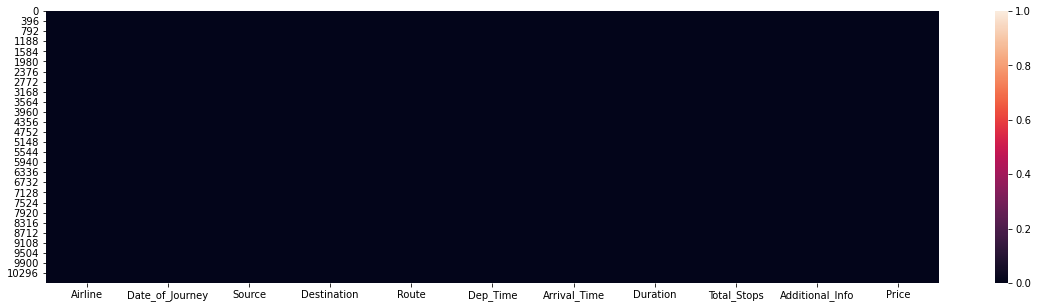

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20,5))
sns.heatmap(Flight_Train.isnull())

In [5]:
print(Flight_Train.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [6]:
Flight_Train['Route'].fillna(Flight_Train['Route'].mode()[0], inplace=True)
Flight_Train['Total_Stops'].fillna(Flight_Train['Total_Stops'].mode()[0], inplace=True)

<AxesSubplot:>

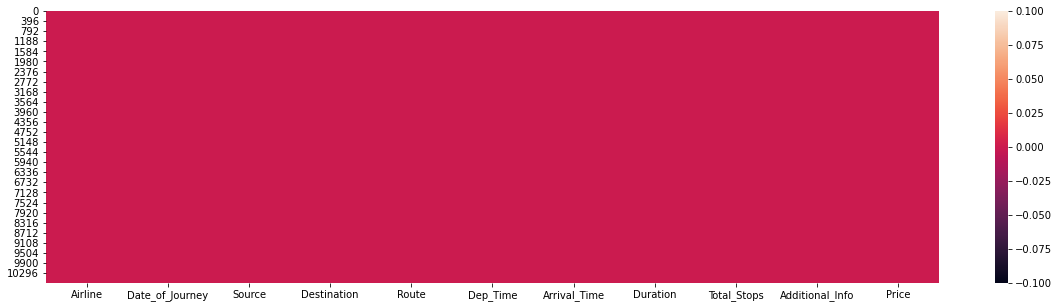

In [7]:
plt.figure(figsize = (20,5))
sns.heatmap(Flight_Train.isnull())

Here we are performing some feature engineering step for EDA just to get better clearity of data.

# Univariate Analysis

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


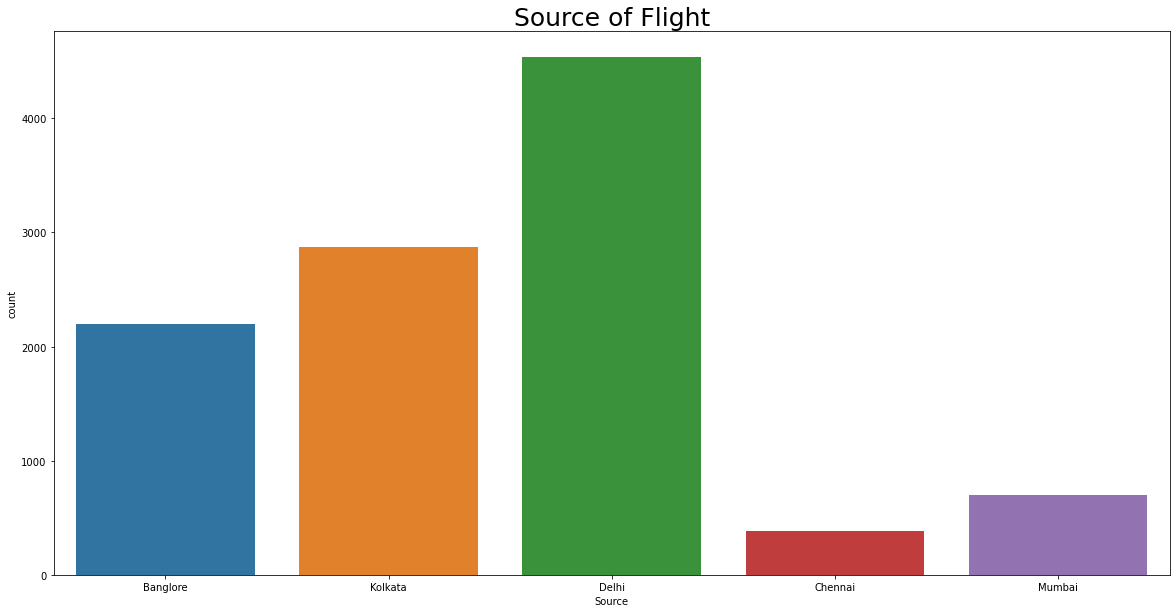

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(Flight_Train['Source'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot(x="Source", data=Flight_Train)
plt.title("Source of Flight", fontsize = 25)
plt.show()

We can clearly see that Maximum number of Filght Source was Delhi or we can say 4537 Flights source was Delhi.

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


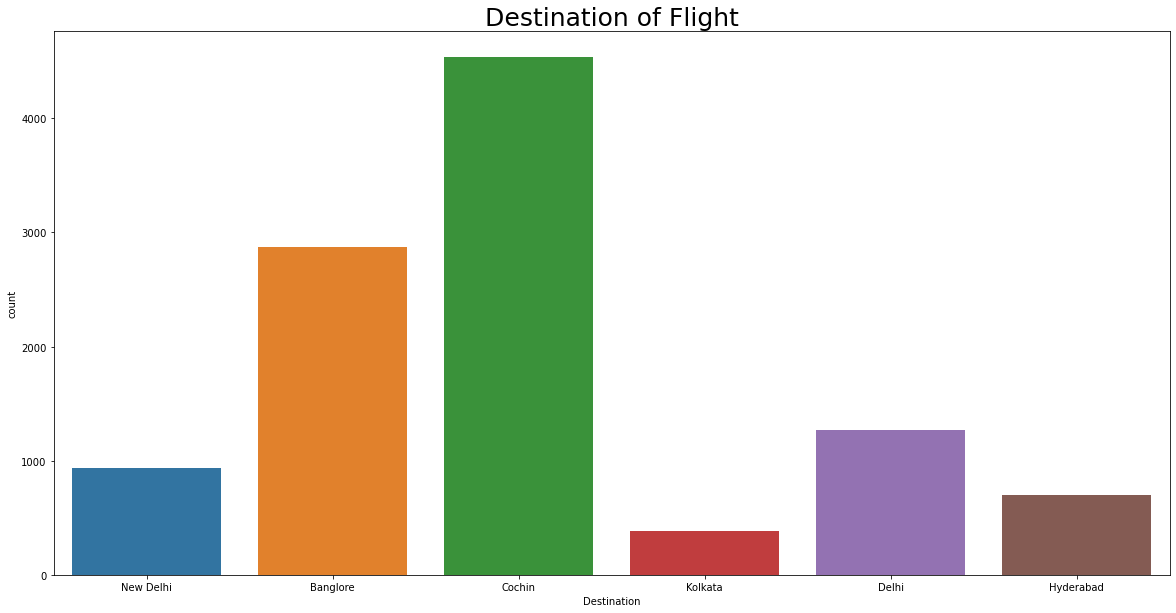

In [10]:
print(Flight_Train['Destination'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot(x="Destination", data=Flight_Train)
plt.title("Destination of Flight", fontsize = 25)
plt.show()

4537 Flight Destination was Cochin i.e. Maximum

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


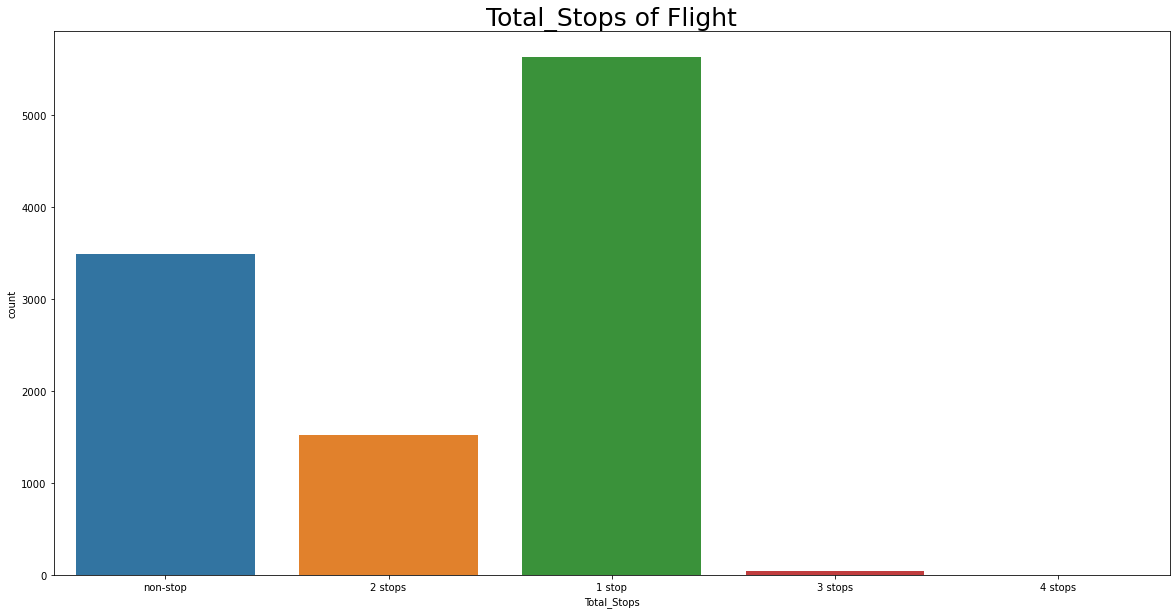

In [11]:
print(Flight_Train['Total_Stops'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot(x="Total_Stops", data=Flight_Train)
plt.title("Total_Stops of Flight", fontsize = 25)
plt.show()

Most of the flights were having 1 stop is 5626 or  0 stops is 3491

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


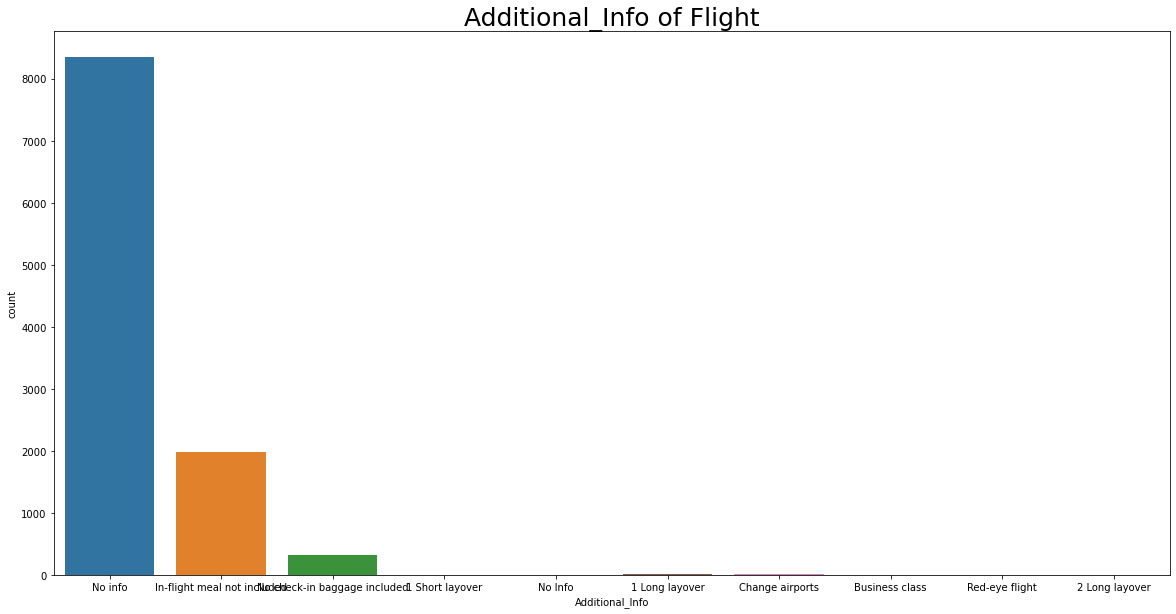

In [12]:
print(Flight_Train['Additional_Info'].value_counts())
plt.figure(figsize = (20,10))
ax=sns.countplot(x="Additional_Info", data=Flight_Train) 
plt.title("Additional_Info of Flight", fontsize = 25) 
plt.show()

Generally there is no information in flight.

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


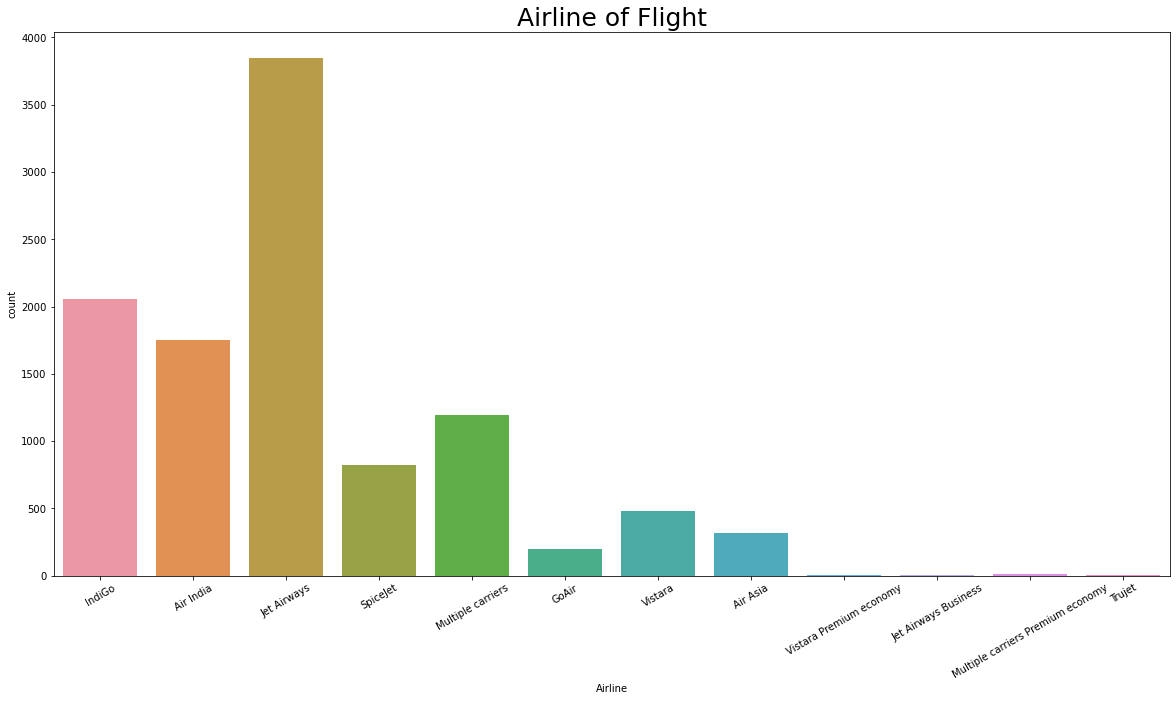

In [14]:
print(Flight_Train['Airline'].value_counts())
plt.figure(figsize = (20,10)) 
ax=sns.countplot(x="Airline", data=Flight_Train) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Airline of Flight", fontsize = 25)
plt.show() 

Mostly Jet Airways Airlines Filghts fly in sky.

# Bi-variate Analysis

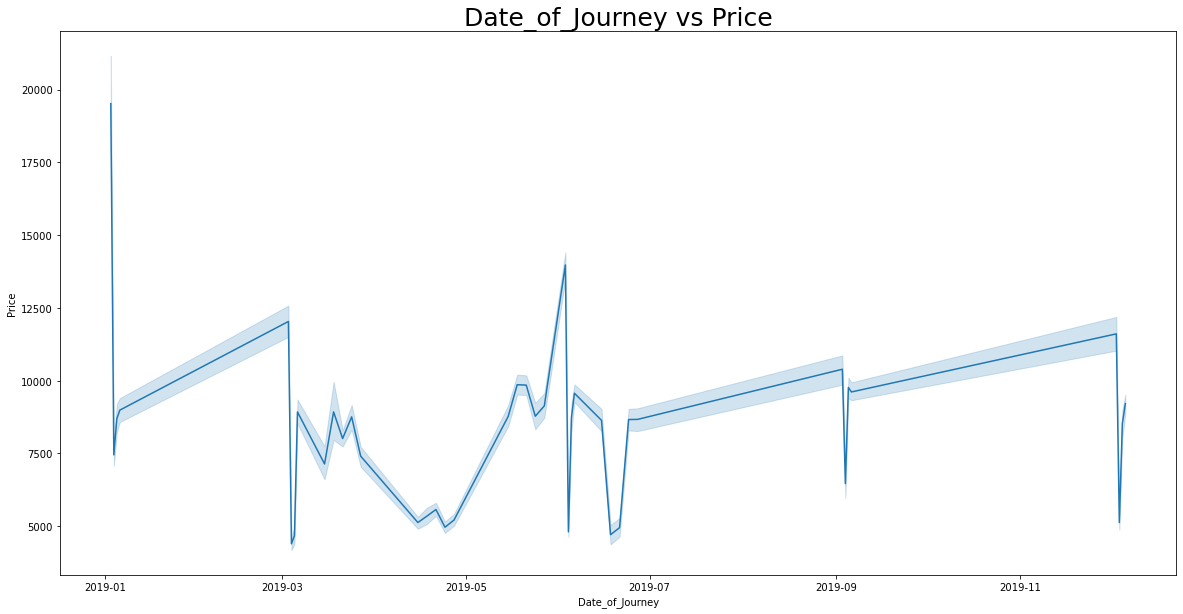

In [17]:
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'], errors='coerce')
plt.figure(figsize = (20,10))
ax = sns.lineplot(x="Date_of_Journey",y="Price",  data=Flight_Train)
plt.title("Date_of_Journey vs Price", fontsize = 25)
plt.show()

In January starting Flight prices were high as 20,000 than suddenly in dropped to 7500, then after that Flight prices slightly increasing from jun to march 8000 to 12500 and in March and April flight prices are slightly decreasing and increasing multiple times. From May to June prices are going high, June and July prices are going up and down, July till September price increasing suddenlt price down and than again it's going high till mid of november.

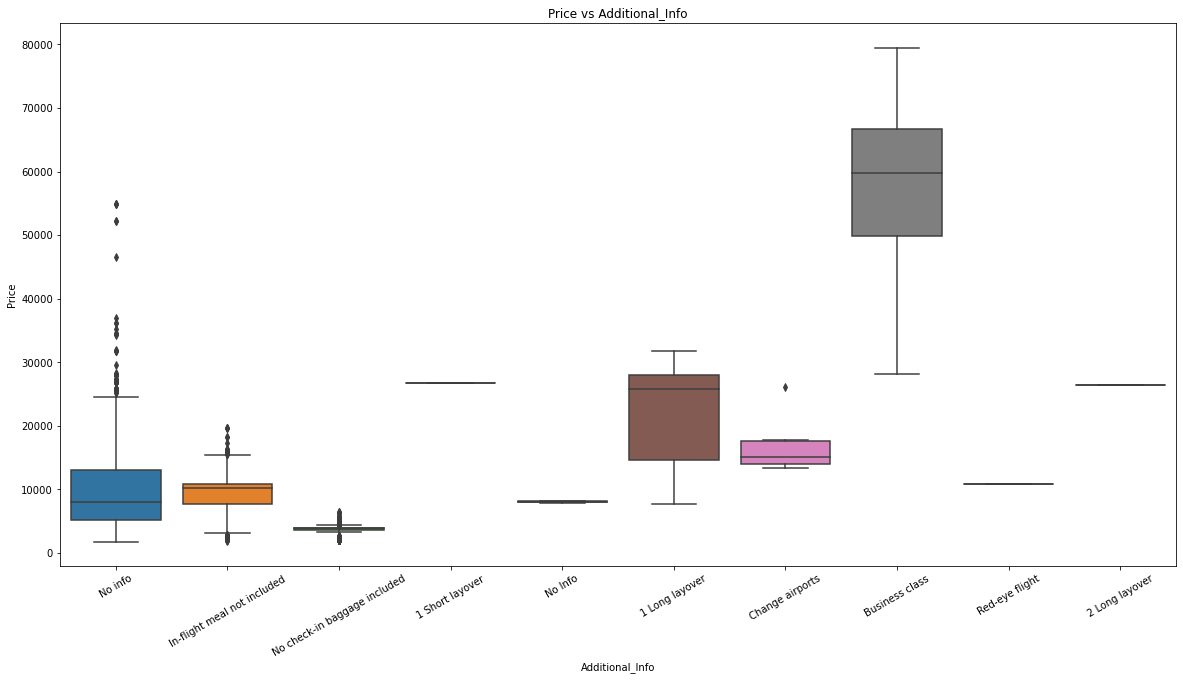

In [18]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Additional_Info'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Additional_Info')
plt.show()

we can notice - The Flight price is too low when No check-in baggage were allowed.
When customer choose Business Class that time Price goes too high.
When No meal provided in Flight that time flight prices are always lesser than 20,000.

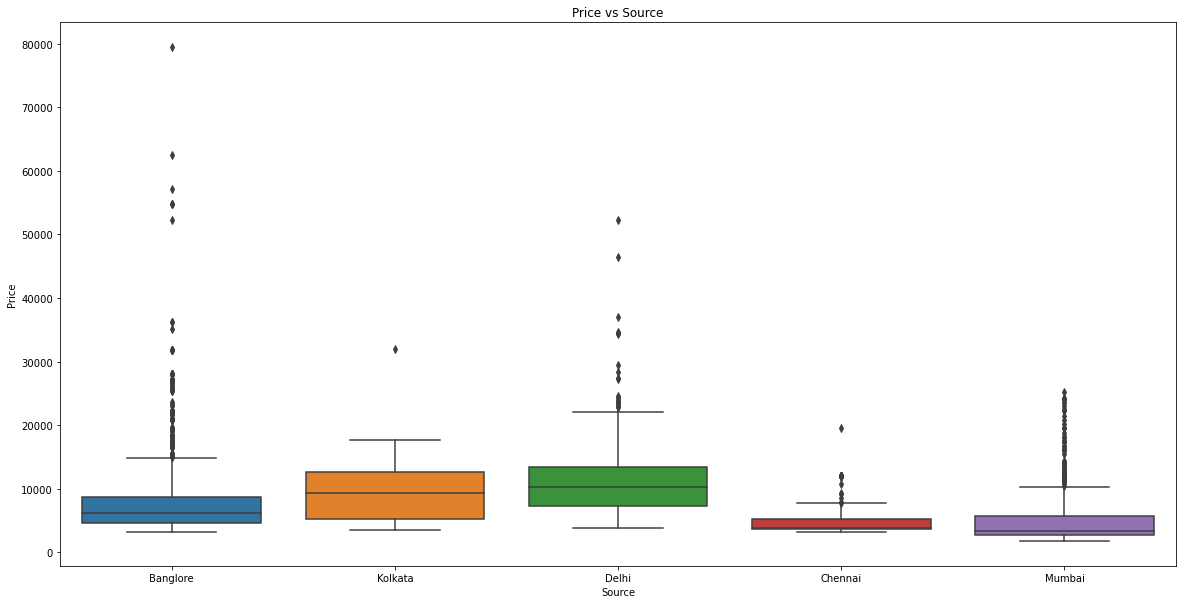

In [19]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Source'], Flight_Train['Price'])
plt.title('Price vs Source')
plt.show()

From Chennai and Mumbai the flights are cheaper as compared with other Sources

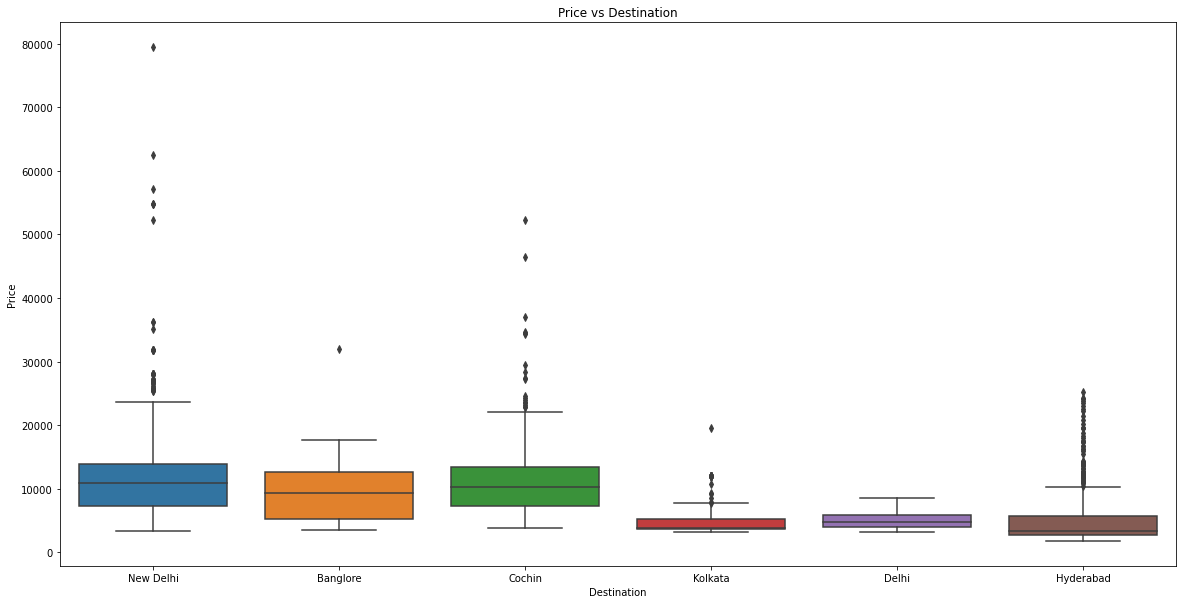

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Destination'], Flight_Train['Price'])
plt.title('Price vs Destination')
plt.show()

Kolkata, Delhi and Hyderabad flights are cheaper than other Destination price

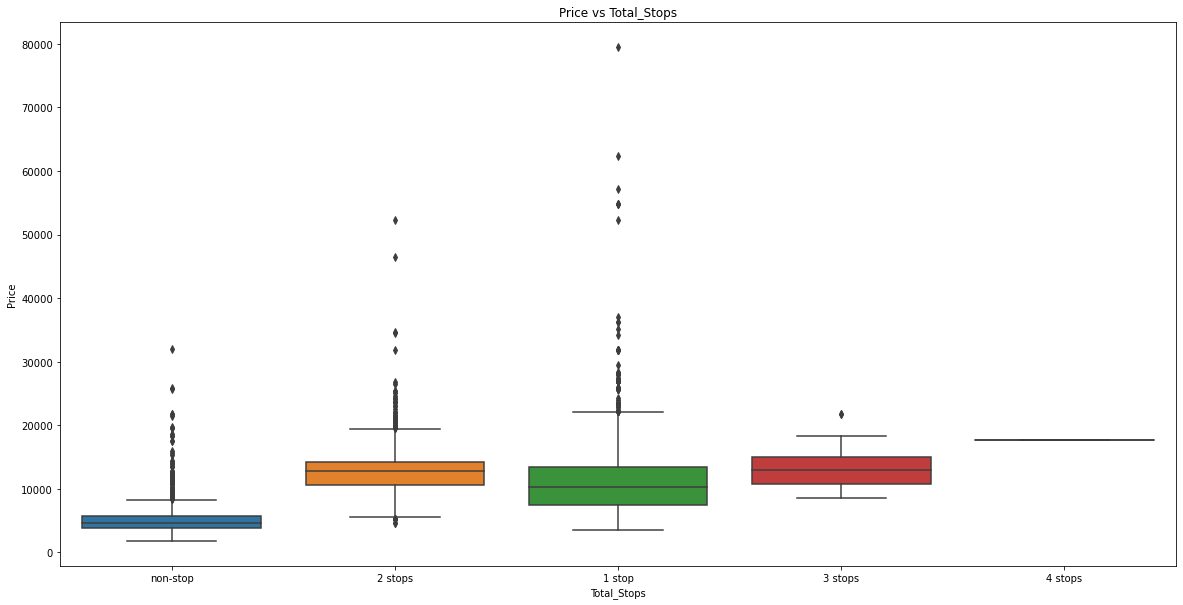

In [21]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Total_Stops'], Flight_Train['Price'])
plt.title('Price vs Total_Stops')
plt.show()

Non-Stops flights are cheaper

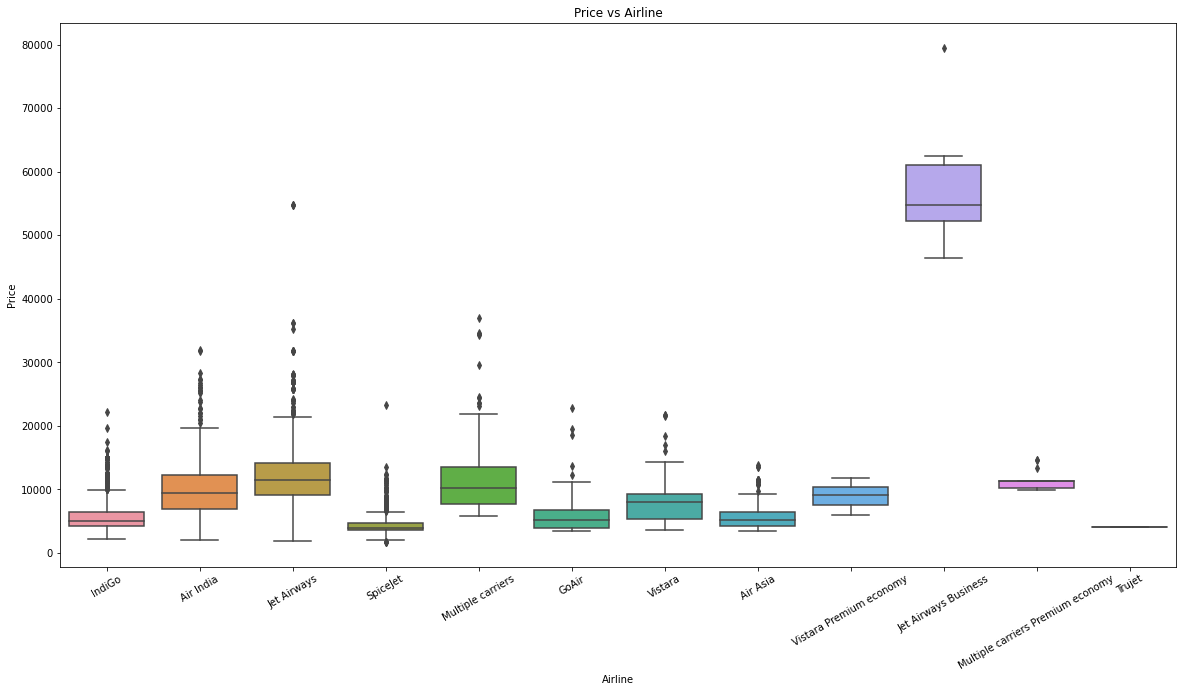

In [22]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Airline'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Airline')
plt.show()

Jet Airways flights are always expencive and Spivejet flights are cheaper.

# Feature Engineering

In [23]:
Flight_Train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [24]:
Flight_Train["Additional_Info"]=Flight_Train["Additional_Info"].replace("No Info","No info")

In [25]:
Flight_Train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
Flight_Train.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)
Flight_Train['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [28]:
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [29]:
#Converting Duration from string to numbers
Flight_Train['hour'] = Flight_Train['Duration'].str.split("h").str[0]
Flight_Train['nothing'] = Flight_Train['Duration'].str.split(" ").str[1]
Flight_Train['minute'] = Flight_Train['nothing'].str.split("m").str[0]
Flight_Train.drop('nothing',axis=1,inplace=True)

In [30]:
Flight_Train['hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [31]:
for i in range(0,10682):
    if(Flight_Train['hour'][i] == '5m'):
        Flight_Train["hour"][i] = 0
        Flight_Train["minute"][i] = 5

In [32]:
import numpy as np
Flight_Train['hour'] = pd.to_numeric(Flight_Train['hour']) #Converting object to numeric
Flight_Train['minute'] = pd.to_numeric(Flight_Train['minute']) #Converting object to numeric
Flight_Train['minute']=Flight_Train['minute'].replace(np.NaN,0) #Replacing null values with 0
Flight_Train['minute'] = Flight_Train['minute'].astype('int64') #Converting float to int
Flight_Train['Duration'] = Flight_Train['hour']*60 + Flight_Train['minute'] #Converting hours and minutes into minutes
Flight_Train.drop('hour',axis=1,inplace=True) #Dropping hour becuase work is over
Flight_Train.drop('minute',axis=1,inplace=True) #Dropping minute becuase work is over
Flight_Train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [35]:
Flight_Train['Dep_Time'] = pd.to_datetime(Flight_Train['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(Flight_Train['Dep_Time'],format = '%H:%M').dt.minute*60

In [36]:
import datetime as dt
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'])
Flight_Train['Date_of_Journey'] = Flight_Train['Date_of_Journey'].map(dt.datetime.toordinal)
Flight_Train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,BLR → DEL,2520,01:10 22 Mar,170,0,No info,3897
1,Air India,737064,Kolkata,Banglore,CCU → IXR → BBI → BLR,3300,13:15,445,2,No info,7662
2,Jet Airways,737308,Delhi,Cochin,DEL → LKO → BOM → COK,2040,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,737398,Kolkata,Banglore,CCU → NAG → BLR,1380,23:30,325,1,No info,6218
4,IndiGo,737062,Banglore,New Delhi,BLR → NAG → DEL,3960,21:35,285,1,No info,13302


In [37]:
Flight_Train.drop('Route',axis=1,inplace=True)
Flight_Train.drop('Arrival_Time',axis=1,inplace=True)

In [38]:
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,2520,170,0,No info,3897
1,Air India,737064,Kolkata,Banglore,3300,445,2,No info,7662
2,Jet Airways,737308,Delhi,Cochin,2040,1140,2,No info,13882
3,IndiGo,737398,Kolkata,Banglore,1380,325,1,No info,6218
4,IndiGo,737062,Banglore,New Delhi,3960,285,1,No info,13302


# Label Encoding

In [39]:
#Label encoding for the object columns
label_list=list(Flight_Train.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for i in label_list:
    Flight_Train[i] = le.fit_transform(Flight_Train[i])

# Multivariate Analysis

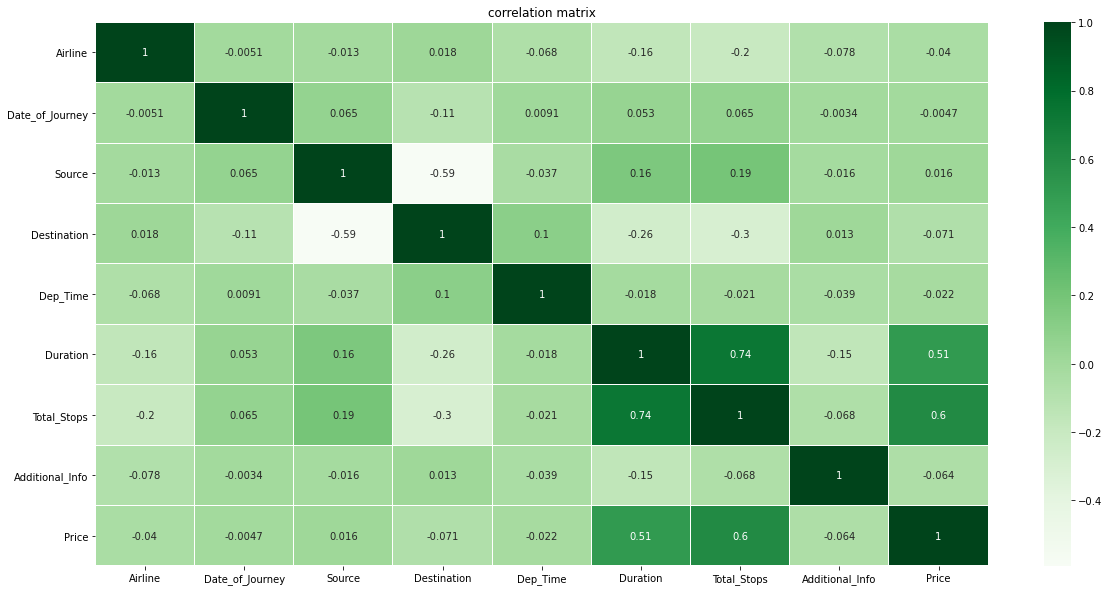

In [40]:
fig=plt.figure(figsize=(20,10))
hc=Flight_Train.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Greens",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Price is highly corelated with Duration and Total_Stops

In [41]:
Flight_Train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,737208.509033,1.952261,1.436113,2214.114013,643.093232,0.824207,6.582140,9087.064121
std,2.352155,89.113653,1.177221,1.474782,1169.509740,507.862001,0.675199,0.838073,4611.359167
min,0.000000,737062.000000,0.000000,0.000000,120.000000,5.000000,0.000000,0.000000,1759.000000
25%,3.000000,737142.000000,2.000000,0.000000,1140.000000,170.000000,0.000000,7.000000,5277.000000
50%,4.000000,737203.000000,2.000000,1.000000,2160.000000,520.000000,1.000000,7.000000,8372.000000
75%,4.000000,737237.000000,3.000000,2.000000,3120.000000,930.000000,1.000000,7.000000,12373.000000
max,11.000000,737399.000000,4.000000,5.000000,4680.000000,2860.000000,4.000000,8.000000,79512.000000


There is difference between Mean and std of Price of Outliers must be present in it.

<AxesSubplot:title={'center':'Correlation with Price Graph'}>

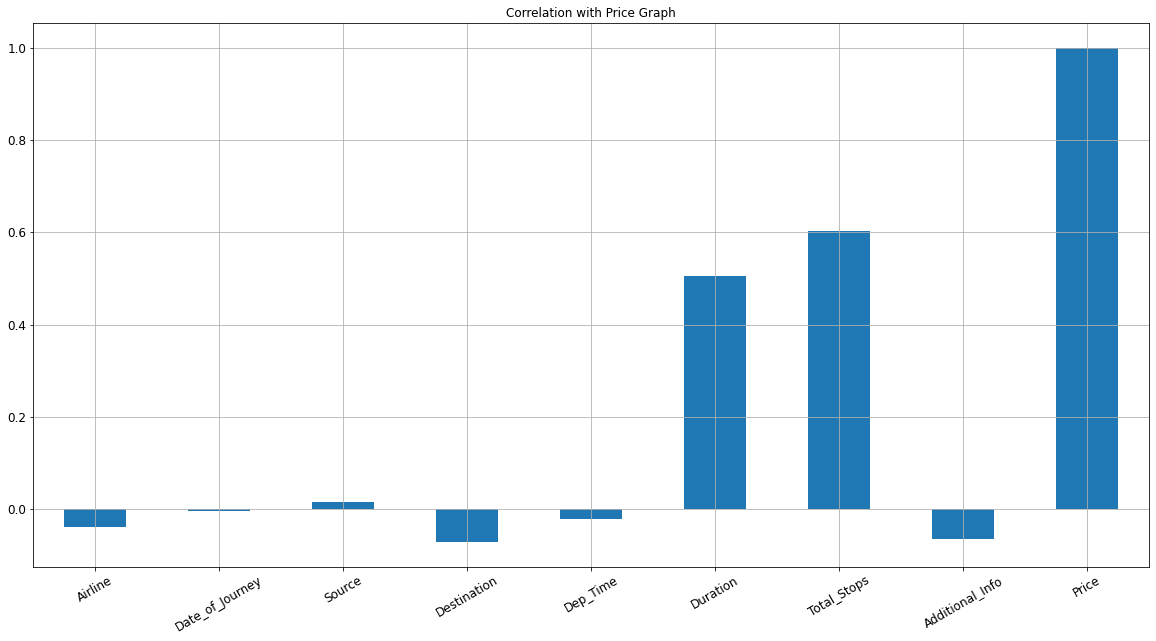

In [42]:
Flight_Train.corrwith(Flight_Train.Price).plot.bar(
        figsize = (20, 10), title = "Correlation with Price Graph", fontsize = 12,
        rot = 30, grid = True)


As we saw earlier Duration and Total_Stops are highly correalted with Price

# Removing Skewness and Outliers

In [44]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Flight_Train))
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1712,  1785,  1791,  1804,  1918,  2055,  2079,
        2099,  2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,
        2556,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3457,  3496,
        3535,  3535,  3568,  3584,  3700,  3700,  3788,  3790,  3815,
        3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,  4463,
        4521,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5013,
        5050,  5136,  5372,  5372,  5439,  5446,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,
        5856,  5933

In [45]:
z=np.abs(zscore(Flight_Train))
threshold=3
new_Flight_Train=Flight_Train[(z<3).all(axis=1)]
print(Flight_Train.shape)
print(new_Flight_Train.shape)

(10683, 9)
(10475, 9)


In [46]:
#checking for how much data we lost
loss_percent=(10683-10475)/10683*100
print(loss_percent)

1.9470186277262942


We lost almost 2% of our data

# Checking of Skewness

In [47]:
new_Flight_Train.skew()

Airline            0.730109
Date_of_Journey    0.486566
Source            -0.438959
Destination        1.266475
Dep_Time           0.198542
Duration           0.779912
Total_Stops        0.230633
Additional_Info   -1.468582
Price              0.415788
dtype: float64

In [48]:
new_Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,737142,0,5,2520,170,0,7,3897
1,1,737064,3,0,3300,445,2,7,7662
2,4,737308,2,1,2040,1140,2,7,13882
3,3,737398,3,0,1380,325,1,7,6218
4,3,737062,0,5,3960,285,1,7,13302


# Removing skewness

In [49]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Flight_Train.columns:
    if abs(new_Flight_Train.loc[:,i].skew())>0.55:
        new_Flight_Train.loc[:,i]=PT.fit_transform(new_Flight_Train.loc[:,i].values.reshape(-1,1))

In [50]:
new_Flight_Train.skew()

Airline           -0.013402
Date_of_Journey    0.486566
Source            -0.438959
Destination        0.041017
Dep_Time           0.198542
Duration          -0.046552
Total_Stops        0.230633
Additional_Info   -1.136146
Price              0.415788
dtype: float64

# Seperating Input and Output Variables with x and y

In [51]:
y = new_Flight_Train["Price"]
x = new_Flight_Train.drop(["Price"], axis=1)

# Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new = scale.fit(x)  
scale_x = new.transform(x)
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() 

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.419360,0.237389,0.00,1.000000,0.526316,0.482236,0.0,0.165293
1,0.176956,0.005935,0.75,0.000000,0.697368,0.660378,1.0,0.165293
2,0.515086,0.729970,0.50,0.440768,0.421053,0.856249,1.0,0.165293
3,0.419360,0.997033,0.75,0.000000,0.276316,0.599840,0.5,0.165293
4,0.419360,0.000000,0.00,1.000000,0.842105,0.575230,0.5,0.165293


# Finding Best Random State

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)


Best accuracy is 0.541727777298484  on Random_state  360


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [57]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [58]:
for m in model:
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.541727777298484
Mean Absolute Error:      2157.9507478109467
Mean Squared error:       7496763.619334311
Root Mean Squared Error:  2738.0218442032765
[0.51923883 0.50886524 0.54308765 0.52366029 0.48988203 0.5123335
 0.48144136 0.53559304]
cross validation score:   0.5142627412249386
Difference between R2 score and cross validatio score is -  0.027465036073545335
*******************************************************************************
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.88578756453287
Mean Absolute Error:      764.1876075973819
Mean Squared error:       1868373.4005044142
Root Mean Squared Error:  1366.8845600504874
[0.88586356 0.89785028 0.88543266 0.89191695 0.87985002 0.88638122
 0.89077291 0.87870256]
cross validat

Random Forest Regressor model have heighest accuracy i.e. 88.59% with 88.70% cross validation score which is good and the difference is too less.

# Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(x_train,y_train) 
clf.best_params_  

{'criterion': 'mse',
 'max_depth': 22,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [61]:
clf_pred=clf.best_estimator_.predict(x_test)

In [62]:
r2_score(y_test, clf_pred)

0.8858319246417534

Our model learnt Almost 89%

# Saving the model

In [63]:
import joblib
joblib.dump(clf.best_estimator_,"AM7_Flight.obj")
RF_from_joblib=joblib.load('AM7_Flight.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([ 8002.37      ,  9860.41      , 12898.        , ...,
        6136.545     ,  8783.38333333,  4975.65      ])

In [64]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0        1        2        3            4        5         6     \
Predicted  8002.37  9860.41  12898.0  3335.63  6105.674286  6711.79  11819.84   
Original   5567.00  8372.00  12898.0  3210.00  6093.000000  5073.00  13663.00   

                   7            8         9        10      11      12    \
Predicted  11977.429667  8477.825286  14354.87  7244.74  5132.1  6238.4   
Original   13504.000000  9187.000000  14781.00  7229.00  4668.0  5386.0   

               13        14       15         16       17       18       19    \
Predicted  12235.48   9487.16  17244.3  11641.985  3237.38  5021.49  6788.14   
Original   12395.00  11410.00  15025.0  11668.000  4392.00  5613.00  8040.00   

                  20           21       22           23          24    \
Predicted  9182.858373  5772.404667  7824.13  5833.923762  10302.3375   
Original   9001.000000  5126.000000  7832.00  6961.000000   8851.0000   

                  25        26        27           28        29       30    \
Predicted  4740.114071   9198.11  5321.552  4157.722785  13051.82  6404.24   
Original   4823.000000  10203.00  5228.000  4823.000000  13364.00  5963.00   

              31           32           33       34       35       36    \
Predicted  8990.05  6569.595667  8194.609832  12898.0  7244.74  12898.0   
Original   8147.00  6860.000000  6795.000000  12898.0  7229.00  12898.0   

                   37           38        39           40       41    \
Predicted   9721.509583  4668.437639  12926.87  9354.766154  5354.26   
Original   10696.000000  4804.000000  11467.00  8601.000000  5201.00   

                  42        43           44       45           46       47    \
Predicted  4368.679331  15947.82  5939.266667  7339.18  3660.046667  15129.0   
Original   4174.000000  16289.00  6934.000000  7229.00  3597.000000  15129.0   

               48            49           50       51        52        53    \
Predicted  14932.89  12032.028333  7712.672667  3858.67  12093.79  12447.84   
Original   15129.00   7198.000000  6513.000000  3841.00   9417.00  12646.00   

              54       55         56           57       58        59    \
Predicted  5286.94  7055.15  8642.6275  9795.625659  11087.0  10664.78   
Original   4544.00  7064.00  8728.0000  6645.000000  11087.0   9134.00   

                  60           61       62        63        64       65    \
Predicted  4379.287669  8119.912208  5367.15  16978.98  10584.81  3811.15   
Original   4488.000000  7258.000000  4544.00  17261.00  10441.00  3807.00   

                   66       67         68       69       70       71    \
Predicted  12023.828889  5544.32  12510.544  3448.74  6509.79  4286.81   
Original   12093.000000  4483.00   7198.000  2754.00  5601.00  4050.00   

               72       73        74           75       76        77    \
Predicted  10513.99  8897.39  11899.92  8839.990384  9483.84  13508.52   
Original   10844.00  8586.00  11213.00  6953.000000  9968.00  16775.00   

               78        79           80            81        82    \
Predicted  13085.62  10198.45  4754.626179  10279.752222  13077.04   
Original   13044.00  14871.00  4804.000000  10678.000000  13029.00   

                  83       84       85           86        87       88    \
Predicted  8886.719621  6220.88  6261.11  7111.063889  16561.52  3636.83   
Original   9100.000000  6314.00  6195.00  6818.000000  16274.00  3332.00   

                   89        90       91        92        93           94    \
Predicted  11634.819333  4731.636  3840.65  6279.785  16089.28  8643.014417   
Original   11793.000000  4145.000  5725.00  6093.000  17493.00  8018.000000   

              95       96        97            98       99       100   \
Predicted  3729.98  14224.8  16605.53  14203.714167  7391.03  6895.56   
Original   3543.00  13941.0  18752.00  17057.000000  7229.00  6069.00   

              101      102      103      104          105      106   \
Predicted  6634.96  16200.0  2397.94  6152.27  9424.8391

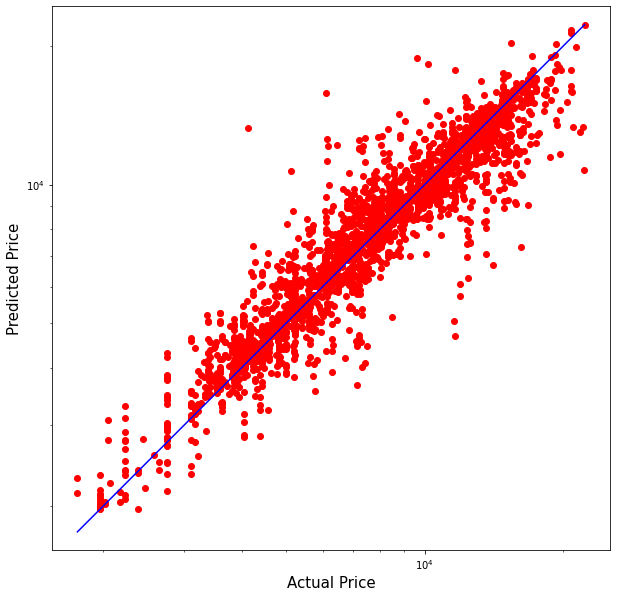

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='r')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data

In [70]:
Flight_Test=pd.read_excel("C:/Users/lenovo/Downloads/Flight_Test.xlsx")
Flight_Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
Flight_Test['Route'].fillna(Flight_Test['Route'].mode()[0], inplace=True)
Flight_Test['Total_Stops'].fillna(Flight_Test['Total_Stops'].mode()[0], inplace=True)

In [72]:
Flight_Test["Additional_Info"]=Flight_Test["Additional_Info"].replace("No Info","No info")

In [73]:
Flight_Test.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [74]:
Flight_Test['hour'] = Flight_Test['Duration'].str.split("h").str[0]
Flight_Test['nothing'] = Flight_Test['Duration'].str.split(" ").str[1]
Flight_Test['minute'] = Flight_Test['nothing'].str.split("m").str[0]
Flight_Test.drop('nothing',axis=1,inplace=True)

In [75]:
Flight_Test.shape

(2671, 12)

In [76]:
for i in range(0,2670):
    if(Flight_Test['hour'][i] == '5m'):
        Flight_Test["hour"][i] = 0
        Flight_Test["minute"][i] = 5

In [77]:
Flight_Test['hour'] = pd.to_numeric(Flight_Test['hour']) 
Flight_Test['minute'] = pd.to_numeric(Flight_Test['minute']) 
Flight_Test['minute']=Flight_Test['minute'].replace(np.NaN,0) 
Flight_Test['minute'] = Flight_Test['minute'].astype('int64')
Flight_Test['Duration'] = Flight_Test['hour']*60 + Flight_Test['minute'] 
Flight_Test.drop('hour',axis=1,inplace=True) 
Flight_Test.drop('minute',axis=1,inplace=True) 
Flight_Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,0,No info


In [78]:
Flight_Test['Dep_Time'] = pd.to_datetime(Flight_Test['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(Flight_Test['Dep_Time'],format = '%H:%M').dt.minute*60

In [79]:
import datetime as dt
Flight_Test['Date_of_Journey'] = pd.to_datetime(Flight_Test['Date_of_Journey'])
Flight_Test['Date_of_Journey'] = Flight_Test['Date_of_Journey'].map(dt.datetime.toordinal)
Flight_Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,DEL → BOM → COK,2820,04:25 07 Jun,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,CCU → MAA → BLR,1560,10:20,240,1,No info
2,Jet Airways,737200,Delhi,Cochin,DEL → BOM → COK,2040,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,737200,Delhi,Cochin,DEL → BOM → COK,480,21:00,780,1,No info
4,Air Asia,737234,Banglore,Delhi,BLR → DEL,4680,02:45 25 Jun,170,0,No info


In [80]:
Flight_Test.drop('Route',axis=1,inplace=True)
Flight_Test.drop('Arrival_Time',axis=1,inplace=True)

In [81]:
Flight_Test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,2820,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,1560,240,1,No info
2,Jet Airways,737200,Delhi,Cochin,2040,1425,1,In-flight meal not included
3,Multiple carriers,737200,Delhi,Cochin,480,780,1,No info
4,Air Asia,737234,Banglore,Delhi,4680,170,0,No info


In [82]:
label_list=list(Flight_Test.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for i in label_list:
    Flight_Test[i] = le.fit_transform(Flight_Test[i])

In [83]:
z=np.abs(zscore(Flight_Test))
print(np.where(z>3))

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877,  954,
       1022, 1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1802,
       1861, 1918, 1945, 2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492],
      dtype=int64), array([6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7,
       7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5], dtype=int64))


In [84]:
z=np.abs(zscore(Flight_Test))
threshold=3
new_Flight_Test=Flight_Test[(z<3).all(axis=1)]
print(Flight_Test.shape)
print(new_Flight_Test.shape)

(2671, 8)
(2640, 8)


In [85]:
loss_percent=(2671-2640)/2671*100
print(loss_percent)

1.1606140022463498


In [86]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Flight_Test.columns:
    if abs(new_Flight_Test.loc[:,i].skew())>0.55:
        new_Flight_Test.loc[:,i]=PT.fit_transform(new_Flight_Test.loc[:,i].values.reshape(-1,1))

In [87]:
x=new_Flight_Test

In [88]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() 
new = scale.fit(x)  
scale_x = new.transform(x) 
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.4,0.456973,0.50,0.439690,0.592105,0.723130,0.5,1.0
1,0.3,0.997033,0.75,0.000000,0.315789,0.523724,0.5,1.0
2,0.4,0.409496,0.50,0.439690,0.421053,0.899682,0.5,0.0
3,0.6,0.409496,0.50,0.439690,0.078947,0.761021,0.5,1.0
4,0.0,0.510386,0.00,0.664262,1.000000,0.461984,0.0,1.0


In [89]:
Predicted = RF_from_joblib.predict(x)
Predicted

array([ 6210.14      ,  4914.32      ,  8928.1       , ...,
       12752.51      , 11394.65      , 10018.69119156])

# Thank You